<a href="https://colab.research.google.com/github/PriyankaMittapelly/SaiPriyanka_INFO5731_-Fall2020/blob/main/priyanka_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
f1=pd.read_csv("freeFormResponses.csv")
f2=pd.read_csv("multipleChoiceResponses.csv")
f3=pd.read_csv("SurveySchema.csv")

In [ ]:
f2.head()

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9,Q10,Q11_Part_1,Q11_Part_2,Q11_Part_3,Q11_Part_4,Q11_Part_5,Q11_Part_6,Q11_Part_7,Q11_OTHER_TEXT,Q12_MULTIPLE_CHOICE,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,Q13_Part_5,Q13_Part_6,Q13_Part_7,Q13_Part_8,Q13_Part_9,Q13_Part_10,Q13_Part_11,...,Q46,Q47_Part_1,Q47_Part_2,Q47_Part_3,Q47_Part_4,Q47_Part_5,Q47_Part_6,Q47_Part_7,Q47_Part_8,Q47_Part_9,Q47_Part_10,Q47_Part_11,Q47_Part_12,Q47_Part_13,Q47_Part_14,Q47_Part_15,Q47_Part_16,Q48,Q49_Part_1,Q49_Part_2,Q49_Part_3,Q49_Part_4,Q49_Part_5,Q49_Part_6,Q49_Part_7,Q49_Part_8,Q49_Part_9,Q49_Part_10,Q49_Part_11,Q49_Part_12,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,In what industry is your current employer/cont...,In what industry is your current employer/cont...,How many years of experience do you have in yo...,What is your current yearly compensation (appr...,Does your current employer incorporate machine...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,Select any activities that make up an importan...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,Which of the following integrated development ...,...,Approximately what percent of your data projec...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,What methods do you prefer for explaining and/...,"Do you consider ML models to be ""black boxes"" ...",What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and methods do you use to make your...,What tools and method

In [ ]:
b=f2[["Q1","Q9"]]
b

,Q1,Q9
0,What is your gender? - Selected Choice,What is your current yearly compensation (appr...
1,Female,NaN
2,Male,"10-20,000"
3,Female,"0-10,000"
4,Male,NaN
...,...,...
23855,Male,"250-300,000"
23856,Female,NaN
23857,Male,"10-20,000"
23858,Male,NaN


In [ ]:
b=b.dropna()
b=b.drop(0)
b.isnull().sum(axis=0)
b=b[b["Q1"]!="Prefer not to say"]
b=b[b["Q9"]!="I do not wish to disclose my approximate yearly compensation"]
b

,Q1,Q9
2,Male,"10-20,000"
3,Female,"0-10,000"
5,Male,"0-10,000"
7,Male,"10-20,000"
8,Male,"0-10,000"
...,...,...
23844,Male,"90-100,000"
23845,Male,"0-10,000"
23854,Male,"10-20,000"
23855,Male,"250-300,000"


### Question 1:

In [ ]:
M=b[b["Q1"]=="Male"]
F=b[b["Q1"]=="Female"]
M=M.sort_values(by=['Q9'])
F=F.sort_values(by=['Q9'])
MM=int(len(M["Q9"])/2)+1
FM=int(len(F["Q9"])/2)+1
print("Median income of Male Employees:",b.Q9[MM])
print("Median income of Female Employees:",b.Q9[FM])

Median income of Male Employees: 30-40,000
Median income of Female Employees: 0-10,000


### Question 2:

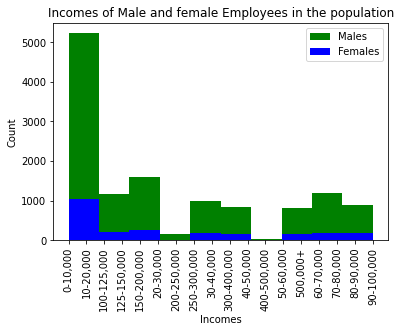

In [ ]:
plt.hist(M["Q9"],label="Males",color ='green',)
plt.hist(F["Q9"],label="Females",color ='blue',)
plt.xlabel("Incomes")
plt.ylabel("Count")
plt.title("Incomes of Male and female Employees in the population")
plt.xticks(rotation=90)
plt.legend()

### Question 3:

In [ ]:
b["Q9"]=b["Q9"].replace(['10-20,000','0-10,000','20-30,000','125-150,000','30-40,000','50-60,000',
'100-125,000','90-100,000' ,'70-80,000','80-90,000','60-70,000','400-500,000','40-50,000',
'150-200,000','300-400,000','200-250,000','500,000+','250-300,000'],[15000,5000,25000,145000,
35000,55000,120000,95000,75000,85000,65000,495000,45000,195000,395000,245000,500000,295000])
p=b[b["Q1"]!='Prefer to self-describe']
p

,Q1,Q9
2,Male,15000
3,Female,5000
5,Male,5000
7,Male,15000
8,Male,5000
...,...,...
23844,Male,95000
23845,Male,5000
23854,Male,15000
23855,Male,295000


In [ ]:
males=p[p["Q1"]=="Male"]
males.groupby("Q1").median()

,Q9
Q1,
Male,35000


In [ ]:
females=p[p["Q1"]=="Female"]
females.groupby("Q1").median()

,Q9
Q1,
Female,25000


In [ ]:
#The Test statistic, the Null hypothesis and the Alternative hypothesis

# b["Q9"].mean()
# from scipy.stats import ttest_1samp
# salary_mean = a["Q9"].mean()

# ttest,aval = ttest_1samp(a["Q9"],salary_mean)
# ttest,aval

import scipy.stats as stats
stats.ttest_1samp(a=p["Q9"],popmean=p["Q9"].mean())

Ttest_1sampResult(statistic=0.0, pvalue=1.0)

In [ ]:
p.groupby('Q1').median()

,Q9
Q1,
Female,25000
Male,35000


In [ ]:
sampledata=p.sample(n=500)
sampledata

,Q1,Q9
10703,Male,5000
4315,Male,45000
7793,Female,15000
23169,Male,5000
3132,Male,15000
...,...,...
12562,Male,25000
10348,Male,5000
14576,Male,25000
10878,Male,120000


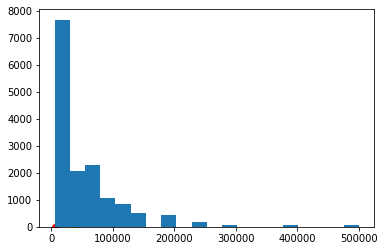

In [ ]:
#Histogram for the sample to calculate the median income of the sample, and draw a reddot and a yellow dot of the female median income and male median income of the population.

plt.hist(b["Q9"],bins=20)
plt.xticks()
plt.scatter(b.Q9[MM],0,color="yellow")
plt.scatter(b.Q9[FM],0,color="red")

In [ ]:
#Histogram of the test statistic of the sample to draw a red dot to show the corresponding teststatistic of the population.

p.groupby('Q1').median()
diff_male_female_salary=(males["Q9"].median())-(females["Q9"].median())
diff_male_female_salary

10000.0

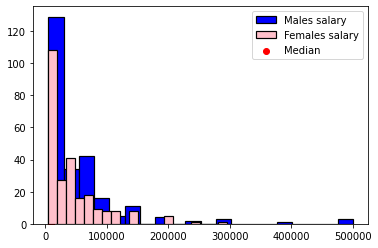

In [ ]:
sample_male=males.sample(n=250)
sample_female=females.sample(n=250)

plt.hist(sample_male["Q9"],bins=20,alpha=1.0,edgecolor='black',color='blue', linewidth=1.2,label="Males salary") # Plots histogram for 500 samples of Median salries of Male 
plt.hist(sample_female["Q9"],bins=20,alpha=1.0,edgecolor='black',color='pink', linewidth=1.2,label="Females salary") # Plots histogram for 500 samples of Median salries of Female 

plt.scatter(diff_male_female_salary,0,color='red',label='Median') # Plot dot for Median differnce of male and female
plt.legend()

In [ ]:
#Procedure to use bootstrap to produce at least 5000 samples

np.random.seed(500)
def bootstrap(pop):
    sample=np.random.choice(pop,len(pop))
    s=sample.mean()
    return s
l=[]
for i in range(5000):
    x=bootstrap(p["Q9"])
    l.append(x)
print(l)
print(len(l))

[51869.34277843369, 52581.98871835235, 52105.79824216188, 51315.75495211859, 52060.86842450479, 52218.28676374131, 51480.06034369671, 52213.039485766756, 52067.09956709957, 51056.670602125145, 51718.48353666536, 51909.025318116226, 52503.607503607505, 51601.40364685819, 51789.32178932179, 51726.35445362718, 51846.71389216844, 52375.377148104424, 52264.528400892035, 51190.148235602785, 52170.07739735013, 52156.63124754034, 51382.3297914207, 52069.72320608684, 52885.01902138266, 52948.642266824085, 51155.385019021385, 51268.201495474226, 51556.4738292011, 52641.67650531287, 51896.56303292667, 52842.05693296602, 51897.874852420304, 52040.86317722681, 51051.75127902401, 52109.405745769385, 51889.020070838254, 51743.40810704447, 51420.044601862784, 52196.313787222876, 52210.415846779484, 52309.78617342254, 51427.5875639512, 51468.58192312738, 51458.41532205169, 51895.25121343303, 51887.38029647121, 51907.71349862259, 52388.167388167385, 51803.09589400498, 51942.8046700774, 52041.84704184704

(array([   9.,   67.,  356.,  980., 1384., 1279.,  658.,  228.,   36.,
           3.]),
 array([50063.29529057, 50458.67768595, 50854.06008133, 51249.44247672,
        51644.8248721 , 52040.20726748, 52435.58966286, 52830.97205824,
        53226.35445363, 53621.73684901, 54017.11924439]),
 <a list of 10 Patch objects>)

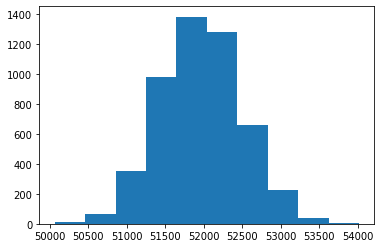

In [ ]:
#Histogram of the test statistic of the bootstrap samples 

plt.hist(l)

In [ ]:
from scipy.stats import ttest_1samp
ttest,pval = ttest_1samp(p["Q9"],np.mean(l)) #for sample booststrap
ttest,pval

(-0.017712390912482338, 0.9858685274701365)

In [ ]:
#Confidence interval and P-value to validate the hypothesis 

Xmean = np.mean(l) # Mean of data
Xstd = np.std(l) # Standard deviation of data
XSE = Xstd/np.sqrt(len(l)) # Standard Error
from scipy.stats import norm
Z_95 = norm.ppf(0.975)
Z_5 = norm.ppf(0.025)

X_ME = Z_95*XSE

ttest,pval = ttest_1samp(p["Q9"],np.mean(l)) #for sample booststrap
X_ME,ttest,pval

(14.614945348302534, -0.017712390912482338, 0.9858685274701365)